In [1]:
import sys
sys.path.append('../python')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from machine_learning import *
from notebook_network_size import find_best_network_size_notebook, try_best_network_sizes
from train_single_network import train_single_network
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/usr/lib64/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = []
with open('../SOD_QMC_DATA.dat', 'r') as inputfile:
    for l in inputfile:
        data.append([float(x) for x in l.split(',')])
data = np.array(data)

parameters = data[:,:6]
samples = data[:,6:]

In [3]:
epochs = 500000
network = [10, 10, 10, 10, 10,1]

# Network sizes


In [ ]:
func_names=['Q1', 'Q2', 'Q3']

for n, func_name in enumerate(func_names):
    display(HTML("<h1>%s</h1>"% func_name))
    try_best_network_sizes(parameters=parameters, 
                           samples=samples[:,n], 
                           base_title='Sod Shock QMC %s' % func_name,
                          epochs=epochs)

Config 4 x 6 ([0 x 0] / [5 x 5])
Training and postprocessing took: 10.129615068435669 seconds (0.16882691780726114 minutes) (0.0028137819634543523 hours)
Config 4 x 12 ([0 x 1] / [5 x 5])
Training and postprocessing took: 23.40536069869995 seconds (0.39008934497833253 minutes) (0.006501489082972209 hours)
Config 4 x 24 ([0 x 2] / [5 x 5])
Training and postprocessing took: 21.49419617652893 seconds (0.3582366029421488 minutes) (0.005970610049035814 hours)
Config 4 x 48 ([0 x 3] / [5 x 5])
Training and postprocessing took: 32.92438817024231 seconds (0.5487398028373718 minutes) (0.009145663380622863 hours)
Config 4 x 96 ([0 x 4] / [5 x 5])
Training and postprocessing took: 35.843247175216675 seconds (0.597387452920278 minutes) (0.0099564575486713 hours)
Config 8 x 6 ([1 x 0] / [5 x 5])
Training and postprocessing took: 53.577977657318115 seconds (0.8929662942886353 minutes) (0.014882771571477254 hours)
Config 8 x 12 ([1 x 1] / [5 x 5])
Training and postprocessing took: 71.25677037239075 s

# Single network


Training took 1161.494019985199 seconds


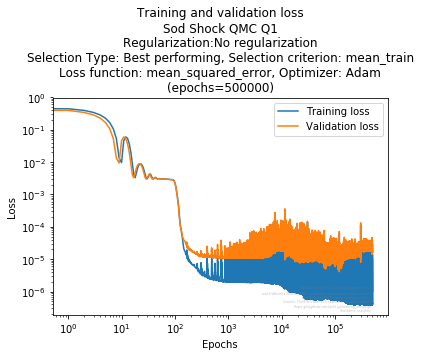


Training took 1253.5678684711456 seconds


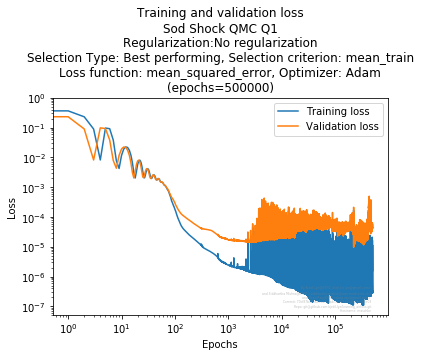


Training took 1314.7274663448334 seconds


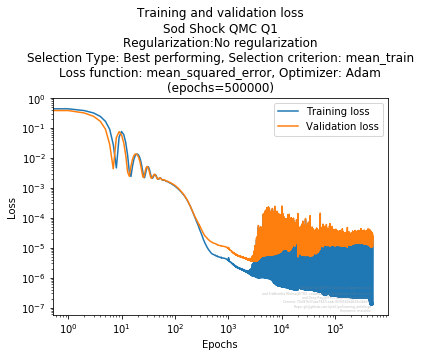

Best network index: 0
Total learning time took: 3773 s


##########################################################################################
#SodShockQMCQ1_Noregularization_Bestperforming_mean_train_mean_squared_error_Adam_network#
##########################################################################################
-----  ----  ----------
Layer  Size  Parameters
0      12    84
1      12    156
2      10    130
3      12    132
4      10    130
5      12    132
6      10    130
7      10    110
8      12    132
9      1     13
Sum          1149
-----  ----  ----------
##########################################################################################


Training took 1329.7580606937408 seconds


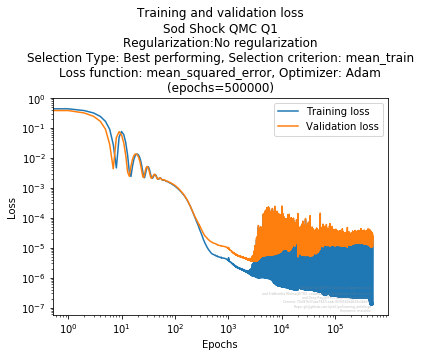

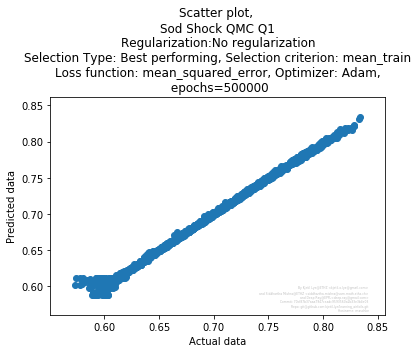

Number of parameters: 1149


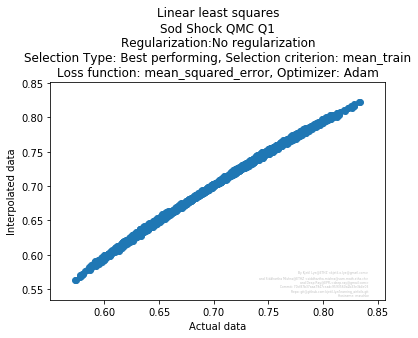

(2000,)
(2000, 6)


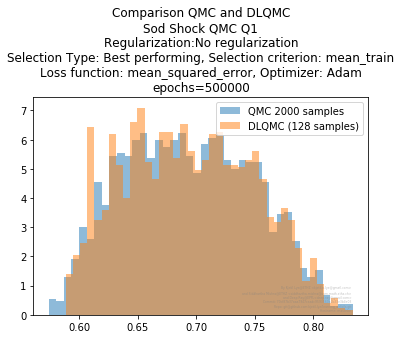

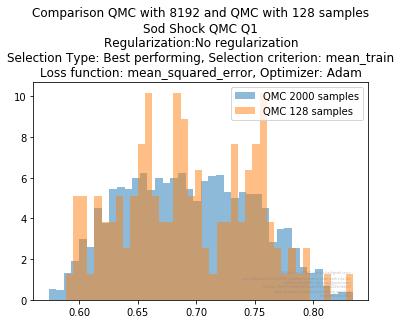

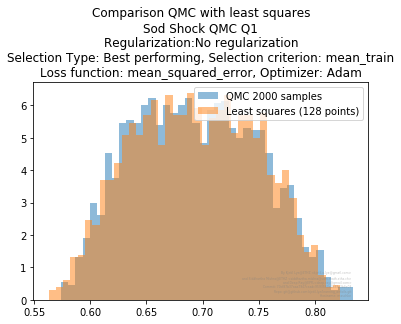

Memory usage: 981228
Memory usage: 981228


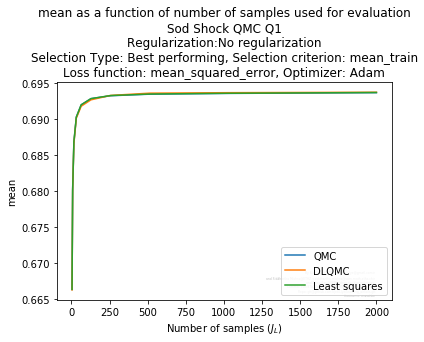

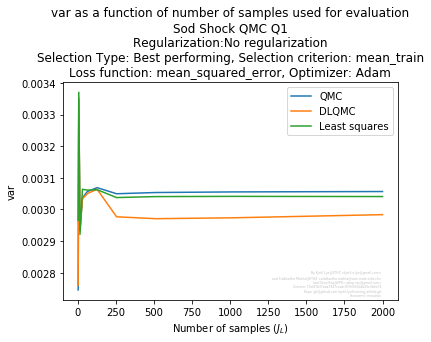

Memory usage: 981228


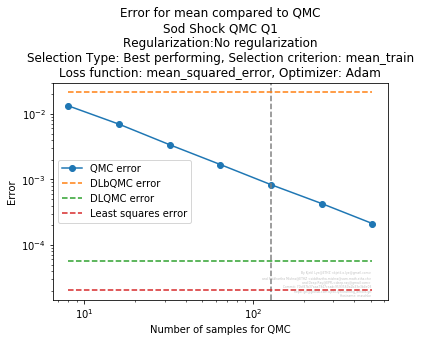

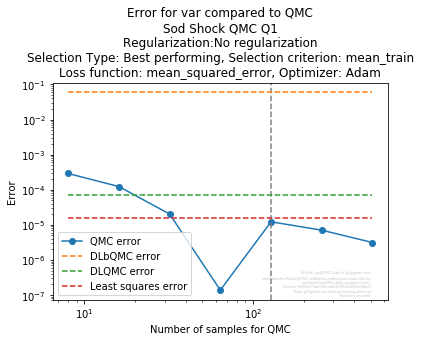

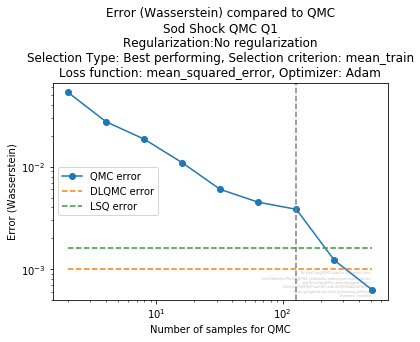

NameError: name 'json' is not defined

In [5]:
func_names=['Q1', 'Q2', 'Q3']


for n, func_name in enumerate(func_names):
    display(HTML("<h1>%s</h1>"% func_name))
    train_single_network(parameters=parameters, 
                         samples=samples[:,n], 
                         base_title='Sod Shock QMC %s' % func_name,
                         network = network,
                         epochs=epochs, 
                         large_integration_points = None)